In [353]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [354]:
import numpy as np

In [355]:
df = pd.read_csv('PCCA_Impute.csv')
df['Datetime']=pd.to_datetime(df['Datetime'])
df.set_index('Datetime',inplace=True)
df.head()

,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,Temp,RH,WS,WD
Datetime,,,,,,,,,,,
2017-01-11 00:00:00,332.50,494.00,107.45,100.97,55.50,3.00,8.90,31.38,80.75,0.72,143.00
2017-01-11 01:00:00,295.50,435.50,95.42,104.13,45.20,2.44,10.70,30.73,81.25,0.53,126.75
2017-01-11 02:00:00,270.00,395.00,77.62,99.42,29.12,1.97,12.18,30.65,82.00,0.60,161.25
2017-01-11 03:00:00,248.50,352.75,74.72,97.13,20.62,1.77,10.75,30.63,83.00,0.50,113.75
2017-01-11 04:00:00,261.75,365.50,82.20,97.62,17.85,1.65,8.72,31.23,85.25,0.85,104.00


In [356]:
df['WC']=df['WD']/df['WS']
df['TC']= df['Temp']-((100-df['RH'])/5)
df

,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,Temp,RH,WS,WD,WC,TC
Datetime,,,,,,,,,,,,,
2017-01-11 00:00:00,332.50,494.00,107.45,100.97,55.50,3.00,8.90,31.38,80.75,0.72,143.00,198.611111,27.53
2017-01-11 01:00:00,295.50,435.50,95.42,104.13,45.20,2.44,10.70,30.73,81.25,0.53,126.75,239.150943,26.98
2017-01-11 02:00:00,270.00,395.00,77.62,99.42,29.12,1.97,12.18,30.65,82.00,0.60,161.25,268.750000,27.05
2017-01-11 03:00:00,248.50,352.75,74.72,97.13,20.62,1.77,10.75,30.63,83.00,0.50,113.75,227.500000,27.23
2017-01-11 04:00:00,261.75,365.50,82.20,97.62,17.85,1.65,8.72,31.23,85.25,0.85,104.00,122.352941,28.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-11 19:00:00,316.25,709.50,139.25,46.30,16.30,4.47,38.43,31.07,81.25,0.32,151.00,471.875000,27.32
2021-12-11 20:00:00,397.75,743.75,148.68,43.05,16.62,4.98,39.30,29.60,84.50,0.30,151.00,503.333333,26.50
2021-12-11 21:00:00,471.50,765.75,137.30,40.27,15.95,0.01,37.17,29.57,86.75,0.30,151.00,503.333333,26.92


In [357]:
# features_to_scale = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone', 'Temp', 'RH','WS','WD']
features_to_scale = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone', 'Temp', 'RH','WS','WD','WC','TC']

def scaling(df,features_to_scale):
    #scaler = RobustScaler()
    scaler = MinMaxScaler()
    #scaler = StandardScaler()

    # Specify the features you want to scale

    # Fit the scaler to your data
    scaler.fit(df[features_to_scale])

    # Transform your data
    scaled_data = scaler.transform(df[features_to_scale])

    # Convert the scaled data array back to a DataFrame
    scaled_df = pd.DataFrame(scaled_data, columns=features_to_scale,index=df.index)

    # Now scaled_df contains the scaled values of your features using RobustScaler
    print(max(scaled_df['PM2.5']))
    print(min(scaled_df['PM2.5']))
    print(scaled_df.describe())

    return scaled_df,scaler

In [358]:
df[features_to_scale],scaler=scaling(df,features_to_scale)
df['dow']=df.index.day_of_week
df['doy']=df.index.day_of_year
df['moy']=df.index.month
df['hour']=df.index.hour
df['year']=df.index.year

1.0
0.0
              PM2.5          PM10           NO2           NH3           SO2  \
count  33217.000000  33217.000000  33217.000000  33217.000000  33217.000000   
mean       0.125821      0.246392      0.120301      0.086700      0.102065   
std        0.123762      0.169811      0.089689      0.044373      0.115830   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.044161      0.122459      0.052835      0.058871      0.033017   
50%        0.084333      0.212798      0.103706      0.082293      0.064782   
75%        0.163170      0.322974      0.164977      0.106019      0.120160   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 CO         Ozone          Temp            RH            WS  \
count  33217.000000  33217.000000  33217.000000  33217.000000  33217.000000   
mean       0.095593      0.210278      0.323071      0.639182      0.028298   
std        0.087771      0.180297      0.05

In [359]:
df_train=df[(df['year']<2021) | (df['moy']<=5)]
df_test=df[(df['year']>=2021) & (df['moy']>=5)]

# Filter df_train to include only the last 14 values
last_14_values = df_train.tail(14)

# Append the last 14 values from df_train to df_test
df_test = pd.concat([last_14_values, df_test], axis=0)

In [360]:
df_train.drop(columns=['year'],inplace=True)
df_test.drop(columns=['year'],inplace=True)

C:\Users\athar\AppData\Local\Temp\ipykernel_16868\2659423081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=['year'],inplace=True)


In [361]:
# columns=['PM2.5','PM10','NO2','NH3','SO2','CO','Ozone','Temp','RH','WS','WD','dow','moy','hour']
columns=['PM2.5','PM10','NO2','NH3','SO2','CO','TC','WC','dow','moy','hour']
# columns=['PM2.5','PM10','TC','WC','dow','moy','hour']
df_train_values=df_train[columns].values

In [362]:
#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past hours.
n_past = 72  # Number of past hours we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_train_values has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_train_values) - n_future +1):
    trainX.append(df_train_values[i - n_past:i, 0:df_train.shape[1]])
    trainY.append(df_train_values[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (28670, 72, 11).
trainY shape == (28670, 1).


In [363]:
# Flatten the last two dimensions into one
trainX = trainX.reshape(trainX.shape[0], -1)

# Now trainX should have a shape of (number of samples, number of past hours * number of features)
print('trainX shape == {}.'.format(trainX.shape))


trainX shape == (28670, 792).


In [364]:
xgb_reg = XGBRegressor()

X_train, X_test, y_train, y_test = train_test_split(trainX, trainY, test_size=0.1, random_state=42)

# Train the model
xgb_reg.fit(X_train, y_train)

# Make predictions
predictions = xgb_reg.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.04223144151363884


C:\Users\athar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [365]:
y_test

array([[0.08508577],
       [0.0177979 ],
       [0.00825708],
       ...,
       [0.25958231],
       [0.48504691],
       [0.23372167]])

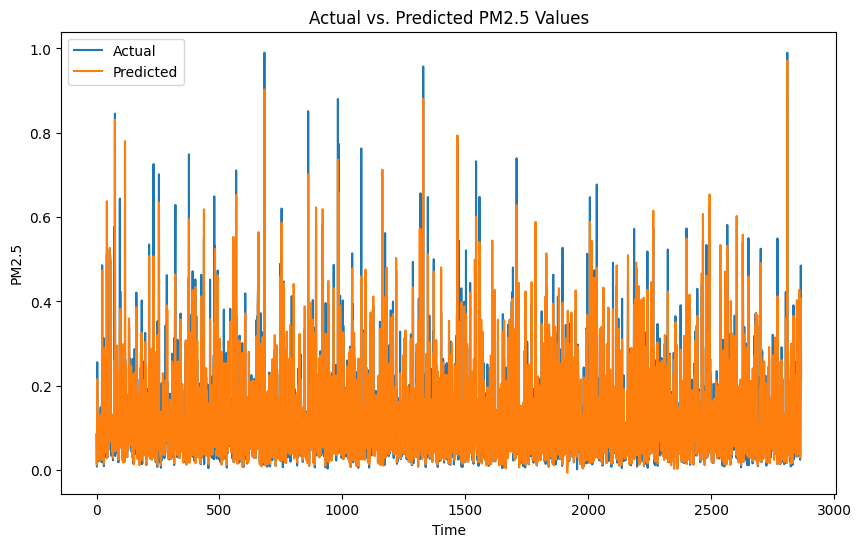

In [366]:
# Visualize actual vs. predicted PM2.5 values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.title('Actual vs. Predicted PM2.5 Values')
plt.legend()
plt.show()

In [367]:
from math import sqrt

testX shape == (5123, 792).
testY shape == (5123, 1).
test shape == (1, 0, 11).
Mean Squared Error (MSE): 0.0008429549719014892
Root Mean Squared Error (RMSE): 0.029033686846514847


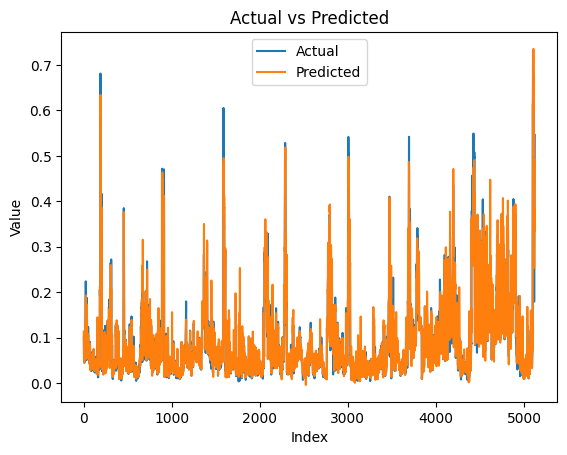

In [368]:
# Extract the values from the test dataset
df_test_values = df_test[columns].values

# Similar to the training data, prepare the test data in the required shape
testX = []
testY = []

# Use the same parameters as used for training
for i in range(n_past, len(df_test_values) - n_future + 1):
    testX.append(df_test_values[i - n_past:i, 0:df_test.shape[1]])
    testY.append(df_test_values[i + n_future - 1:i + n_future, 0])

testX, testY = np.array(testX), np.array(testY)

testX = testX.reshape(testX.shape[0], -1)

print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

test=[]
test.append(df_test_values[14- n_past:14, 0:df_test.shape[1]])
test=np.array(test)
print('test shape == {}.'.format(test.shape))

# Make predictions on the test data
predictions = xgb_reg.predict(testX)

# Flatten the predictions and actual values arrays
# predictions = predictions.flatten()
# actual_values = testY.flatten()
actual_values= testY

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predictions)
print('Mean Squared Error (MSE):', mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

# Plot actual vs predicted values
plt.plot(actual_values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [369]:
predictions.shape

(5123,)

(5123, 1)
(5123, 13)
Mean Squared Error (MSE): 835.7576718454962
Root Mean Squared Error (RMSE): 28.90947373864658


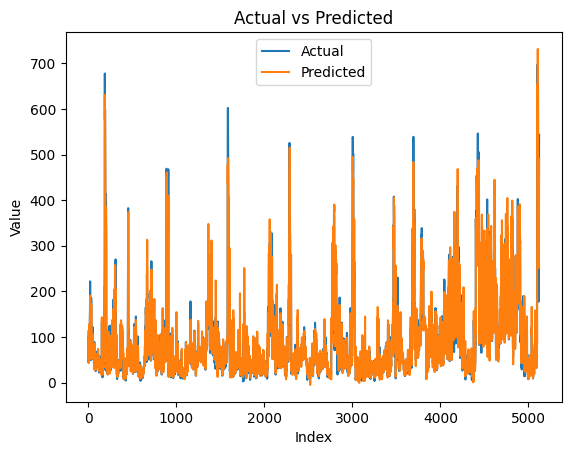

In [370]:
predictions=predictions.reshape(predictions.shape[0],1)
print(predictions.shape)
predictions= np.repeat(predictions, 13, axis=-1)
actual_values=np.repeat(actual_values, 13, axis=-1)

print(predictions.shape)

predictions = scaler.inverse_transform(predictions)[:,0]
actual_values= scaler.inverse_transform(actual_values)[:,0]

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predictions)
print('Mean Squared Error (MSE):', mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

# Plot actual vs predicted values
plt.plot(actual_values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [371]:
print(predictions)

[112.22756   75.123764  55.753616 ... 331.54507  423.23352  489.89072 ]
